<a href="https://colab.research.google.com/github/cornelius152/Text-Classification---Data-Science-Internship/blob/main/Unclassified_Data_Exploratory_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Data**

In [3]:
# Loading unclassified data: below three datafiles were the only files with accessible data
biofresh_data = pd.read_excel('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/biofresh data.xlsx')
bpa_data = pd.read_excel('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/bpa data.xlsx')
oral_data = pd.read_excel('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/oral health data.xlsx')

In [4]:
bpa_data.head(3)

,age_group,RESP_AGE_GROUP,RESP_REGION,RESP_GENDER,SCREENER1,SCREENER2,Q2040445905,Q2004985417,Q2004985417_,Q2060766907,...,Q2076726876__12,Q2076726876__13,Q2076726876__14,Q2076726876_,Q2054527806,Q2093563024,Q2043829202,Q2043829202_,iirepEveryone,iirepSerial
0,Age Groups,RESP_AGE_GROUP,Region,Gender,Are you or your partner receiving any professi...,We would like to remind you that your particip...,What is your gender?,What is your highest degree of education?,Other,"Thank you again for taking the study, your res...",...,"Can you, please tell us more about how you pro...","Can you, please tell us more about how you pro...","Can you, please tell us more about how you pro...",Others,"Have you heard about any remedies (vitamins, a...",Please specify which ones:,"To protect yourself from BPA risks, would you ...",None of the above,iirep everyone,iirep serial
1,21-35,21-35,West South Central,Female,Yes,"Yes, I accept",Female,Highschool,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Good,Take a natural remedy that protects your body ...,NaN,All,1
2,21-35,21-35,Middle Atlantic,Male,Yes,"Yes, I accept",Male,Master’s degree,NaN,NaN,...,No,No,No,NaN,Yes,Vitamins,Both,NaN,All,2


# **Data Organization**

##### Aggregating all questions from available data into one file

In [5]:
# Using pandas concat function to merge all the files: result will be a dataframe of size (n,1)
# Each row is a separate question, which are in row 1 or index 0 of the original file
all_questions = pd.concat([biofresh_data.iloc[0], bpa_data.iloc[0], oral_data.iloc[0]])

In [6]:
# Converting to a pandas dataframe of size (n, 1) after concatenation
all_q = pd.DataFrame(all_questions)
all_q.rename(columns={0: 'questions'}, inplace = True)
all_q.head()

,questions
age_group,Age Groups
RESP_AGE_GROUP,RESP_AGE_GROUP
RESP_REGION,Region
RESP_GENDER,Gender
SCREENER1,What is your highest degree of education?


In [7]:
# Total number of questions within the concatenated dataframe: not distinct questions
len(all_q)

946

# **Exploratory Analysis**

Things we need to know:
1. Total number of distinct or unique questions
3. Visual representation of distribution
4. Wordcloud of all the words in the dataset, minus stopwords and punctuation
5. How about train/test split strategy?

## Total number of distinct or unique questions

In [8]:
# To find the number of distinct questions, I...
# first need to check how many question marks are in each question or row, which is used as a delineator; from this I found...
# there are no questions with greater than 1 question mark, meaning we can assume what comes before the question mark is the actual distinct question, and...
# what comes after it is the variable

count = 0

# For loop to run through all the questions to count number of question marks in each question
for i in all_q['questions']:
    for j in i:
        if j == '?':
            count = 0 # resetting counter

In [9]:
# Extracting every dictinct question:
# I am assuming that a unique question is what comes before the '?' and the rest is just noise: question.split('?')[0]

unique = [] # Instantiating an empty list to hold all unique questions
sep1 = '?' # Setting the separator as '?'

# Loop through all questions, and if a question is not within the empty list 'unique' add the question to the list, otherwise, pass, count total at end
for i in all_q['questions']:
    if i.split(sep1)[0] not in unique:
        unique.append(i.split(sep1)[0]) # I just want the question, which is the first index of once sample is split

In [10]:
# Checking the number of distinct/unique questions in our dataset
print(len(unique))

352


In [11]:
# Double-checking for any repeat questions
# To do this, I will check whether the first 5 words in the question are the same as another questions...
# and then assume, if so then the questions are the same

unique2 = []

for i in unique:
    if i.split(' ')[0:6] not in unique2:
        unique2.append(i)
    else:
        pass

In [12]:
# Checking the new number of distinct/unique questions in our dataset
print(len(unique2))

352


In [13]:
# Triple-checking for any repeat questions
# To do this, I will check whether the words before '-' separtor in the question are the same as other questions...
# and then assume, if so then the questions are the same

unique3 = []
sep2 = '-'

for i in unique:
    if i.split(sep2)[0] not in unique3:
        unique3.append(i.split(sep2)[0])

In [14]:
# Checking the new number of distinct/unique questions based off the previous criteria in our dataset
print(len(unique3))

158


In [15]:
# Although, there are many repeating questions based off the '-' separator, it limits the dataset too much; thusly, I will...
# convert the original unique questions list into a dataframe and use that
unique_df = pd.DataFrame(unique)
unique_df = unique_df.rename(columns={0: 'question'})

In [16]:
unique_df.head(3)

,question
0,Age Groups
1,RESP_AGE_GROUP
2,Region


In [17]:
# Downloading dataset as csv
# unique_df.to_csv('/content/drive/MyDrive/OneHealth Data Science Internship/Colab Notebooks/Data copy/unique_unclassified_questions.csv', index=False)

# **WordCloud**

In [18]:
# Wordcloud
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
# Importing wordcloud as well as stopwords
from wordcloud import WordCloud, STOPWORDS

In [20]:
# Importing string library which will allow us to manipulate strings
import string

# Creating a list of separate words from EVERY question to use in wordcloud
words = []

# Running a for loop to split each question into distinct words and add those words into my words list
for i in unique_df['question']:
    for j in i.split():
        words.append(j)

# Simple preprocessing:
# Removing stopwords from words list
stopwords = sorted(STOPWORDS)

for i in words:
    if i in stopwords:
        words.remove(i)

# Removing punctuation, by converting list of words to a string of words and searching through it for punctuation
string_words = str(words).translate(str.maketrans('', '', string.punctuation))

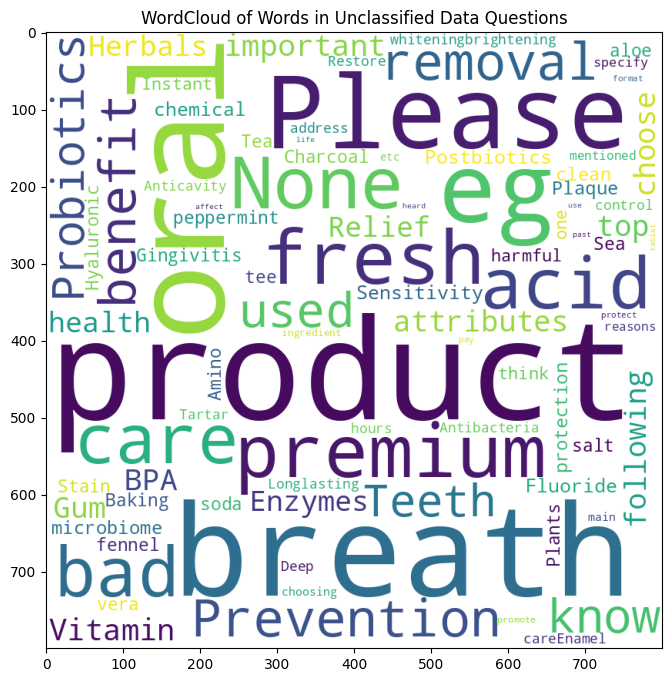

In [21]:
# Generating and plotting wordcloud for words in 'questions' column
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                collocations = False,
                min_font_size = 10).generate(string_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.title('WordCloud of Words in Unclassified Data Questions')
plt.imshow(wordcloud)